<a href="https://colab.research.google.com/github/Rafa2016831028/Artificial-Intelligence/blob/main/K_means_OFD_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import os

from google.colab import files
uploaded = files.upload()
      

Saving OFD.csv to OFD.csv


In [ ]:
data= pd.read_csv('OFD.csv')

In [ ]:
#DATA CLEANING
data.isnull().sum()
data.columns

Timestamp                                                                                                                           0
1. Where do you live during the Pandemic?                                                                                           0
2. Currently, are you living with?                                                                                                  0
3. What is your age (choose the best match range)?                                                                                  0
4. Your Gender?                                                                                                                     0
4. Your Profession?                                                                                                                31
5. What is your current salary range? (monthly)                                                                                     0
6. Does the Covid-19 pandemic affect your financial condition?

In [ ]:
# Sir, After analyse google form response, i hand picked 2, 6, 9, 14 17 18 23 25 26 no question. With intent to clean the data for clustering i am droping the other fields especially quantitive one.
# We may discuss and modify the handpicked factors for further analysis. 
data =data.rename(columns={"1. Where do you live during the Pandemic?": "LIVING_AREA",
                     "2. Currently, are you living with?": "LIVING_STATUS",
                     "3. What is your age (choose the best match range)?":"AGE",
                     "4. Your Gender?":"GENDER",
                     "4. Your Profession?":"PROFESSION",
                     "5. What is your current salary range? (monthly)":"SALARY_RANGE",
                     "6. Does the Covid-19 pandemic affect your financial condition?":"FINANCIAL_CONDITION_AFFECT",
                     "7. How frequently you order food online?":"ORDER_FREQUENCY",
                     "8. Did you order food online during the Covid-19 pandemic?":"ORDER_DURING_PENDAMIC",
                     "9. Do you feel safe using OFD (Online Food Ordering) during the Covid-19  pandemic?":"SAFE_FEEL",
                     "11. Do you think the restaurant food quality is maintained when you order online during the Covid-19 pandemic?":"Perspective_On_Quality",
                     "12. Do you prefer third-party apps (For example FoodPanda / PathaoFood ) more than a restaurant's website to order food online?":"SYSTEM_PREFERENCE",
                     "13. Which apps did you use so far for online food ordering?":"USED_OFD",
                     "14. Your preferred payment method for OFD (Online Food Delivery)?":"PAYMENT_METHOD",
                     "15. Do you think the restaurant rating system in OFD help to order good quality food?  ":"RATING_HELP",
                     "16. What do you think OFD (Online Food Delivery) should improve during a pandemic?":"IMPROVE",
                     "17. Do you feel OFD ensures timeliness?":"timeliness",
                     "18. Do you think OFD provides food less cost then restaurants?":"LESS_COST",
                     "19. When is the best time to use OFD (Online Food Delivery) for you?":"PREFERED_TIME",
                     "20. Did you face any issue describing your address to the delivery man while using (Online Food Delivery) during the pandemic?":"DELIVERY_ISSUE",
                     "21. What encourages you most to use OFD (Online Food Delivery) during a pandemic? ":"ENCOURAGEMENT",
                     "22. What safety measure you notice OFD providers take to ensure safety for the Covid-19  pandemic?":"NOTICED_SAFETY_MEASURE",
                     "23. Did you notice any difference in OFD (Online Food Delivery) before and after the pandemic?":"DIFFERENCE",
                     "24. If yes what's the difference?":"OBSERVED_DIFFERENCE",
                     "25. Did you face any issues using OFD  during the pandemic?":"FACED_ISSUE",
                     "26. Did OFD (Online Food Delivery) owners take any steps to solve the issues you have faced?":"SOLVED_ISSUE"
 })
data.head()

,Timestamp,LIVING_AREA,LIVING_STATUS,AGE,GENDER,PROFESSION,SALARY_RANGE,FINANCIAL_CONDITION_AFFECT,ORDER_FREQUENCY,ORDER_DURING_PENDAMIC,SAFE_FEEL,"10. If yes or no, please share the reason?",Perspective_On_Quality,SYSTEM_PREFERENCE,USED_OFD,PAYMENT_METHOD,RATING_HELP,IMPROVE,timeliness,LESS_COST,PREFERED_TIME,DELIVERY_ISSUE,ENCOURAGEMENT,NOTICED_SAFETY_MEASURE,DIFFERENCE,OBSERVED_DIFFERENCE,FACED_ISSUE,SOLVED_ISSUE,27. Any Comments?
0,2020/10/19 9:46:13 PM GMT+6,Urban area,Family,26-35 Years,Male,Job,"20,000 to 40,000 BDT",No,Never,never,Not always,No reason,No,No,Restaurants Facebook Page,Cash on delivery,No,"Good food, reasonable price, good service, hygine",Not Always,No,Night,No,Discount,Restaurants with Hygiene tag(where OFD ensures...,Yes,Add sanitation option,damage food,responded lately,NaN
1,2020/10/19 9:50:19 PM GMT+6,Urban area,Family,26-35 Years,Female,NaN,"20,000 to 40,000 BDT",Partially,Occationally,More than 10 time,Yes,I need to sanitize the boxes only and also i m...,Not Always,Yes,Foodpanda;Pathao Food;Restaurants Facebook Pag...,others,Maybe,NaN,NaN,NaN,Afternoon,Yes,NaN,Free Sanitization tool (ex. Alchohol Pad) prov...,NaN,NaN,NaN,responded immidiately,NaN
2,2020/10/19 9:50:52 PM GMT+6,Urban area,Family,36-50 Years,Male,Software Engineer,"Above 80,000 BDT",No,Occationally,never,Not always,I dont know,No,Yes,Foodpanda;Uber Eats;HungryNaki,MFS (bkash /Nogodh ),No,NaN,Yes,No,Evening,Yes,Save time and effort,Contact less delivery,No,NaN,Delivary man cant get the location,Did not response,NaN
3,2020/10/19 9:51:25 PM GMT+6,Urban area,Family,19-25 Years,Male,Student,"20,000 to 40,000 BDT",Yes,Weekly,More than 10 time,Not always,NaN,Not Always,Yes,Foodpanda;Pathao Food;Uber Eats,Cash on delivery,Yes,NaN,Not Always,Yes,Evening,Yes,Promo codes;Free Delivery;Discount,Contact less delivery;Their advertisement of h...,Yes,Add contactless delivery;Add sanitation option...,Order cancellation withput reason;Delivery man...,Did not response,no
4,2020/10/19 9:52:11 PM GMT+6,Urban area,Family,26-35 Years,Male,Software Engineer,"20,000 to 40,000 BDT",No,Occationally,Once / Twice,No,"Because, I dont know the environment where the...",Not Always,No,Foodpanda,Cash on delivery,Maybe,delivery boys should be honest,Not Always,No,Afternoon,No,Save time and effort,Free Sanitization tool (ex. Alchohol Pad) prov...,No,NaN,No safety measures,Did not response,NaN


In [ ]:
# removing qualitative analysis fields 10 ,16 ,27
# 13, 22 & 25 needs special data cleaning
data.drop('27. Any Comments?',axis=1,inplace=True)
#data.drop('25. Did you face any issues using OFD during the pandemic?',axis=1,inplace=True)
data.drop('IMPROVE',axis=1, inplace=True)
data.drop('10. If yes or no, please share the reason?',axis=1, inplace=True)

data.head()
data.columns

KeyError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

cleanData = pd.DataFrame({
    'AR': lb_make.fit_transform(data['LIVING_AREA']),
    'LS': lb_make.fit_transform(data['LIVING_STATUS']),
    'AGE': lb_make.fit_transform(data['AGE']),
    'GEN': lb_make.fit_transform(data['GENDER']),
   # 'PROFESSION': lb_make.fit_transform(data['PROFESSION'].astype(str)),
    'S': lb_make.fit_transform(data['SALARY_RANGE']),
    'CFE': lb_make.fit_transform(data['FINANCIAL_CONDITION_AFFECT']),
    'OF':lb_make.fit_transform(data['ORDER_FREQUENCY']),
    'ORD': lb_make.fit_transform(data['ORDER_DURING_PENDAMIC']),
    'SF':lb_make.fit_transform(data['SAFE_FEEL']),
    'POQ':lb_make.fit_transform(data['Perspective_On_Quality']),
    'SP':lb_make.fit_transform(data['SYSTEM_PREFERENCE']),
  #  'USED':lb_make.fit_transform(data['USED_OFD']),
    'PAY':lb_make.fit_transform(data['PAYMENT_METHOD']),
    'RH':lb_make.fit_transform(data['RATING_HELP'].astype(str)),
    'time':lb_make.fit_transform(data['timeliness'].astype(str)),
    'LC':lb_make.fit_transform(data['LESS_COST'].astype(str)),
    'PT': lb_make.fit_transform(data['PREFERED_TIME']),
    'DI': lb_make.fit_transform(data['DELIVERY_ISSUE']),
   # 'ENCOURAGEMENT': lb_make.fit_transform(data['ENCOURAGEMENT'].astype(str)),
    'NSM': lb_make.fit_transform(data['NOTICED_SAFETY_MEASURE']),

})
cleanData.columns =cleanData.columns.str.upper()
cleanData.head(20)

,AR,LS,AGE,GEN,S,CFE,OF,ORD,SF,POQ,SP,PAY,RH,TIME,LC,PT,DI,NSM
0,2,1,2,1,0,0,2,3,1,0,0,0,1,1,0,3,0,21
1,2,1,2,0,0,1,3,1,2,1,2,3,0,3,2,0,1,15
2,2,1,3,1,3,0,3,3,1,0,2,2,1,2,0,1,1,2
3,2,1,1,1,0,2,4,1,1,1,2,0,2,1,1,1,1,8
4,2,1,2,1,0,0,3,2,0,1,0,0,0,1,0,0,0,16
5,2,1,2,1,1,2,4,1,2,2,2,0,2,2,0,3,0,2
6,2,1,1,1,0,0,3,0,1,2,2,0,0,1,0,1,0,2
7,2,1,2,1,0,2,3,0,1,1,1,0,0,0,0,0,0,2
8,2,0,2,1,1,1,3,0,1,1,2,1,2,2,0,1,0,0
9,2,1,2,1,0,2,2,3,0,0,1,0,1,1,1,1,0,22


In [ ]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(cleanData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.cluster_centers_

array([[ 1.38095238,  0.85714286,  1.80952381,  0.61904762,  2.9047619 ,
         1.38095238,  2.28571429,  2.14285714,  1.23809524,  1.0952381 ,
         1.66666667,  0.61904762,  1.28571429,  1.9047619 ,  1.19047619,
         1.57142857,  0.52380952, 14.66666667],
       [ 1.6       ,  0.875     ,  1.825     ,  0.875     ,  3.025     ,
         1.2       ,  2.525     ,  1.35      ,  1.2       ,  1.175     ,
         1.75      ,  0.3       ,  1.3       ,  1.325     ,  0.55      ,
         1.3       ,  0.475     ,  1.95      ],
       [ 1.79166667,  0.625     ,  1.625     ,  0.79166667,  2.83333333,
         1.41666667,  2.54166667,  1.5       ,  1.54166667,  1.29166667,
         1.70833333,  0.29166667,  1.33333333,  1.625     ,  0.70833333,
         1.75      ,  0.625     ,  8.5       ],
       [ 1.64285714,  0.875     ,  1.60714286,  0.64285714,  3.08928571,
         1.07142857,  2.85714286,  2.05357143,  1.23214286,  1.14285714,
         1.53571429,  0.35714286,  1.23214286,  1.321

In [ ]:
Kmean.labels_

array([3, 0, 1, 2, 0, 1, 1, 1, 1, 3, 3, 0, 1, 0, 3, 3, 1, 3, 3, 1, 2, 3,
       2, 3, 2, 1, 3, 0, 3, 1, 3, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 0, 1, 3,
       0, 1, 0, 1, 1, 3, 3, 0, 1, 2, 0, 0, 1, 3, 3, 3, 3, 3, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 1, 1, 2,
       3, 1, 3, 0, 1, 3, 1, 1, 0, 1, 3, 3, 2, 1, 3, 1, 0, 3, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 2, 2, 3, 3, 1, 0, 1, 2, 3, 0, 0, 3,
       0, 3, 1, 3, 3, 3, 0, 1, 3], dtype=int32)

In [ ]:
cleanData['cluster'] = label = Kmean.labels_
sbn.lmplot(x='AREA',y='SF',data=cleanData,hue='cluster',fit_reg=False)

KeyError: ignored

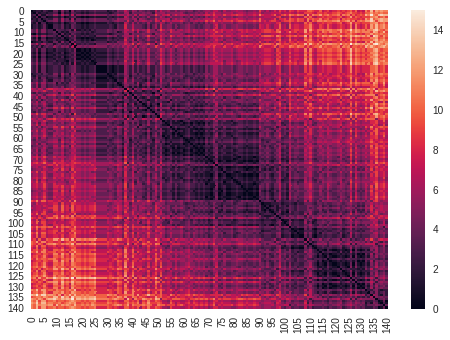

In [ ]:
cleanData['cluster'] = label = Kmean.labels_
cleanData = cleanData.sort_values('cluster')
from sklearn.metrics.pairwise import manhattan_distances
import seaborn as sbn
#'AREA','LS','AGE','GENDER','PROFESSION','SALARY','COVID_FE','FREQUENCY','ORDER_C','SAFE_FEEL','PERSPECTIVE','PREFERENCE','USED','PAYMENT','RATING_HELP','TIMELINESS','LESS_COST'
#row = cleanData[['LS','AGE','GENDER','SALARY','COVID_FE','FREQUENCY','ORDER_C','SAFE_FEEL','PERSPECTIVE','PREFERENCE','PAYMENT','RATING_HELP','TIMELINESS','LESS_COST','PREFERED_TIME','DELIVERY_ISSUE']]
#row = cleanData[['LS','AGE','FREQUENCY','cluster']]
dist_mat = pd.DataFrame(manhattan_distances(row,row))
#sbn.scatterplot(x='AGE', y='FREQUENCY', data=row , hue='cluster')
#plt.show()
sbn.heatmap(dist_mat)
plt.show()
cleanData

import plotly.express as px
fig = px.scatter_matrix(cleanData ,width=700, height=700)
fig.show()

In [ ]:
from collections import Counter
Counter(label).keys() # equals to list(set(words))
Counter(label).values() # counts the elements' frequency

dict_values([56, 21, 40, 24])

In [ ]:
#ELBOW FUNCTION 
k_Range = range(1,10)
WCSS = []
cleanData.drop('cluster',axis=1,inplace=True)
for k in k_Range:
  Kmean = KMeans(n_clusters=k)
  Kmean.fit(cleanData)
  WCSS.append(Kmean.inertia_)


In [ ]:
WCSS

[12833.929078014186,
 3806.612727272727,
 2599.5312738367656,
 2203.4226190476193,
 1982.8530447740975,
 1825.9937097357342,
 1703.350691121744,
 1594.0554197974443,
 1500.3982713193238]

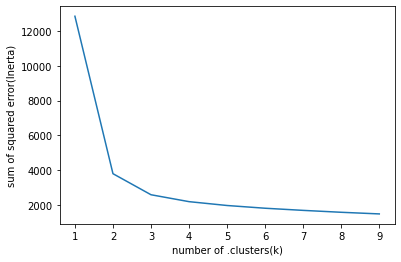

In [ ]:
plt.xlabel('number of .clusters(k)')
plt.ylabel('sum of squared error(Inerta)')
plt.plot(k_Range,WCSS)

AttributeError: ignored

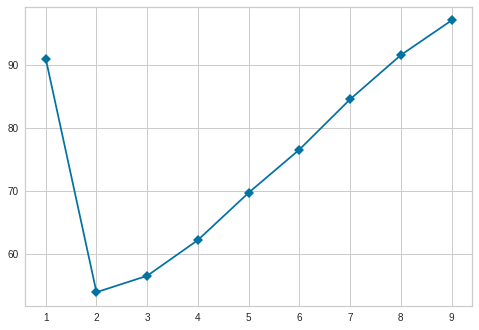

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmean_model = KMeans()
kmean_model.fit(cleanData)
visualizer = KElbowVisualizer(kmean_model, k=(1,10), timings=False)
visualizer.fit(cleanData)        # Fit the data to the visualizer
visualizer.show()

[0.5484063832964076, 0.41388044073036767, 0.32840692661863824, 0.2507032508843153, 0.2161274766448557, 0.20565744667082064, 0.2040316459995908, 0.1987965756980953, 0.18894672863962936]


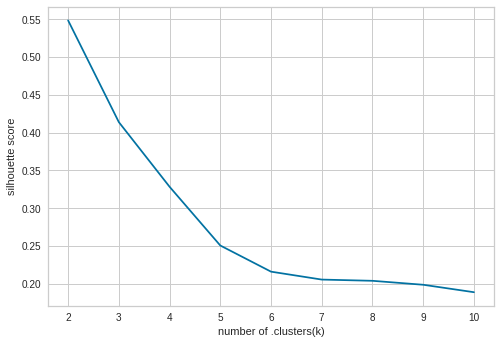

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(cleanData)
  labels = kmeans.labels_
  sil.append(silhouette_score(cleanData, labels, metric = 'euclidean'))
  
#There is a clear peak at k = 2. Hence, it is optimal.
print(sil);
plt.xlabel('number of .clusters(k)')
plt.ylabel('silhouette score')
plt.plot(range(2,kmax+1),sil)